# Theoretical Neuroscience - Chapter 2 Exercises
## Table of Contents
- [Exercise 1](##exercise-1)
    - [Exercise 1.1](##solution-1.1)
    - [Exercise 1.2](##solution-1.2)
    - [Exercise 1.3](##solution-1.3)
    - [Exercise 1.4](##solution-1.4)
- [Exercise 2](##exercise-2)
    - [Exercise 2.1](##solution-2.1)
    - [Exercise 2.2](##solution-2.2)
    - [Exercise 2.3](##solution-2.3)
    - [Exercise 2.4](##solution-2.4)
    - [Exercise 2.5](##solution-2.5)
    - [Exercise 2.6](##solution-2.6)

In [136]:
import pickle as pkl
import matplotlib.pyplot as plt
import numpy as np

## Exercise 1
Use the rate given by equation 2.1 with r0 = 50 Hz and $$D(\tau)=-\cos\left(\frac{2\pi(\tau-20 \text{ ms})}{140 \text{ms}}\right)\exp\left(-\frac{\tau}{60 \text{ ms}}\right)\text{ Hz/ms}$$ to predict the response of a neuron of the electrosensory lateral-line lobe to a stimulus. 
1. Use an approximate Gaussian white noise stimulus constructed by choosing a stimulus value every 10 ms from a Gaussian distribution with zero mean and variance $\sigma_s ^2/\Delta t$ with $\sigma_s^2=10$. 
2. Compute the firing rate over a 10 s period. 
3. From the results, compute the firing rate-stimulus correlation function $Q_{rs}(\tau)$.
4. Using equation 2.6, compare $Q_{rs}(-\tau)/\sigma_s ^2$ with the kernel $D(\tau)$ given above.


## Solution 1.1
Since the stimulus at any time point is not dependent on the stimulus at any other time point we can generate all values concurrently. Moreover, the variance is just $$\frac{\sigma_s ^2}{\Delta t} = \frac{10}{0.01}=1000.$$

In [137]:
def get_approximate_white_noise_stim(T, dt, mean = 0, std = 1):
    """
    Generates approximate white noise stimulus.

    Parameters
    ----------
    T : float
        The duration of time to generate stimulus for.
    dt : float
        The temporal resolution to use.
    mean : float
        The mean stimulus value. (Default is 0)
    std : float
        The standard deviation of the stimulus. (Default is 1)

    Returns
    -------
    white_noise : array_like
        An array of approximate white noise stimulus.
    """

    white_noise = np.random.normal(loc = mean, scale = std, size = int(T/dt))
    return white_noise

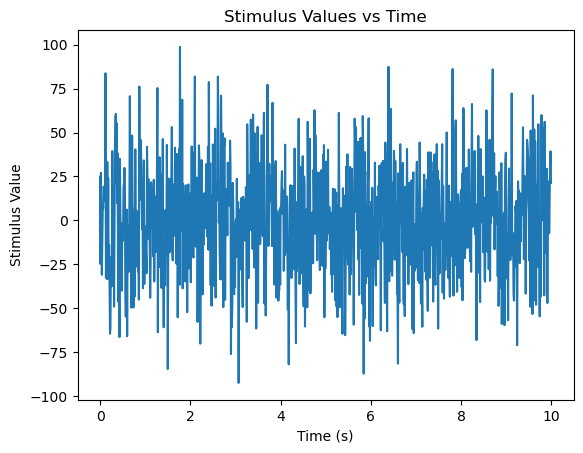

In [138]:
dt = 1e-2
stim = get_approximate_white_noise_stim(10, dt, 0, np.sqrt(1000))
plt.plot([i*dt for i in range(int(10/dt))], stim)
plt.title('Stimulus Values vs Time')
plt.xlabel("Time (s)")
plt.ylabel("Stimulus Value");

## Solution 2.2
To compute the firing rate we must use equation 2.1 which gives $$r_{\text{est}} = r_0 + \int_0^\infty D(\tau)s(t-\tau) d\tau.$$ To implement this We must first generate the kernel given.

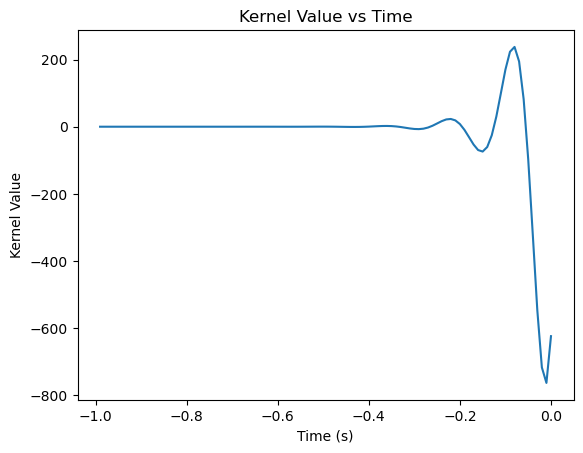

In [139]:
time = np.array([-i*dt for i in range(int(10/dt))])
# Multiply the kernel values by 1000 to convert from Hz/ms.
D = 1000*np.array([-np.cos(2*np.pi*(-t - 0.02)/0.14)*np.exp(t/0.06) for t in time])
plt.plot(time[:int(1/dt)], D[:int(1/dt)])
plt.title("Kernel Value vs Time")
plt.xlabel("Time (s)")
plt.ylabel("Kernel Value");

Now we can implement equation 2.1 as follows. 

In [140]:
def get_firing_rate_estimate(r0, kernel, stim, dt, tau):
    """
    Calculates the firing rate estimate at time t.

    Parameters
    ----------
    r0 : float
        The background firing rate.
    kernel : array_like
        An array which describes the contribution of a stimulus at different time lags.
    stim : array_like
        An array representing stimulus values at different time steps.
    dt : float
        The temporal resolution of the stimulus array.
    tau : float
        The time point to estimate the firing rate at.

    Returns
    -------
    r_est : float
        The estimate of the firing rate at time tau.
    """

    stim_tau = np.roll(stim, -int(tau/dt))
    r_est = r0 + np.sum(kernel * stim_tau)*dt

    return r_est

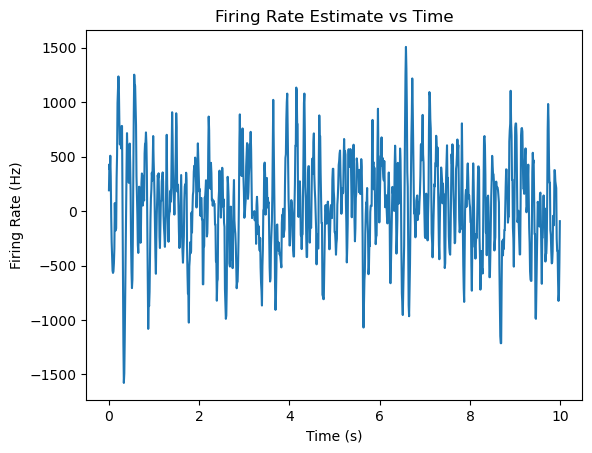

In [141]:
times = [i*dt for i in range(int(10/dt))]
r_est = [get_firing_rate_estimate(50, D, stim, dt, tau) for tau in times]
plt.plot(times, r_est);
plt.title("Firing Rate Estimate vs Time")
plt.xlabel("Time (s)")
plt.ylabel("Firing Rate (Hz)");

## Solution 1.3
We can now use our firing rate-stimulus correlation code from chapter 1 to get:

In [142]:
def get_firing_rate_stimulus_correlation(s, r, T, dt, tau):
    """
    Calculates the correlation of a firing rate and stimulus given a lag time.

    Parameters
    ----------
    s : array_like
        A list of stimulus values.
    r : array_like
        The firing rate in Hz.
    T : float
        The duration of the stimulus sequence in seconds.
    dt : float
        The time step size in seconds
    tau : float
        The lag time to use in seconds.

    Returns
    -------
    q : array_like
        The correlation of the firing rate and stimulus sequence given a lag of tau.
    """

    s_tau = np.roll(s, -int(tau/dt))

    q = (1/T)*np.sum(r*s_tau*dt)

    return q

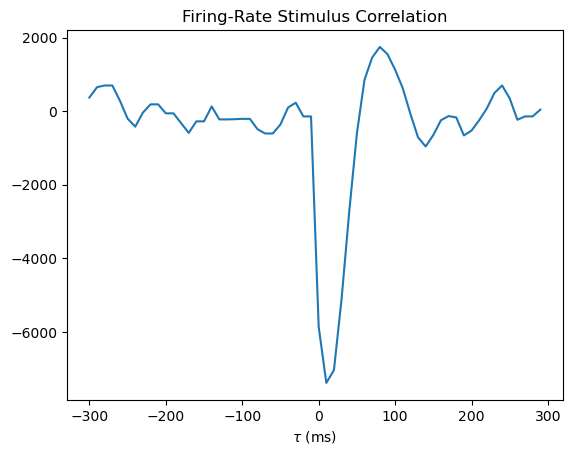

In [143]:
taus = np.array([i*dt -0.3 for i in range(int(0.6/dt))])
qrs = [get_firing_rate_stimulus_correlation(stim, r_est, 10, dt, tau) for tau in taus]
plt.plot(taus*1000, qrs)
plt.title("Firing-Rate Stimulus Correlation")
plt.xlabel(r'$\tau$ (ms)');

## Solution 1.4
Equation 2.6 states that $Q_{rs}(-\tau)/\sigma_s ^2 = D(\tau)$. We can use our firing rate-stimulus code again to calculate  $Q_{rs}(-\tau)/\sigma_s ^2$ and plot it along side our kernel to show that this holds.

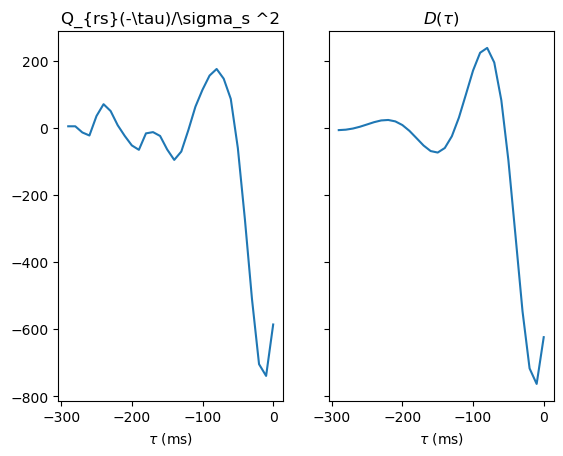

In [144]:
fig, axs = plt.subplots(1, 2, sharex=True, sharey=True)

taus = np.array([-i*dt for i in range(int(0.3/dt))])
qrs = np.array([get_firing_rate_stimulus_correlation(stim, r_est, 10, dt, -tau) for tau in taus])
qrs /= 10
axs[0].plot(taus*1000, qrs)
axs[0].set_title(r'Q_{rs}(-\tau)/\sigma_s ^2')
axs[0].set_xlabel(r'$\tau$ (ms)')

D = np.array([1000*-np.cos(2*np.pi*(-t - 0.02)/0.14)*np.exp(t/0.06) for t in taus])
axs[1].plot(taus*1000, D)
axs[1].set_title(r'$D(\tau)$')
axs[1].set_xlabel(r'$\tau$ (ms)');

We can see from the plots above that equation 2.6 holds.

## Exercise 2
Given data as described in chapter 1 exercise 8:
1. Use the spike-triggered average to construct a linear kernel and use it in equation 2.1 to provide a model of the response of the H1 neuron.  Choose `r0` so that the average firing rate predicted by the model in response to the stimulus used for the data matches the actual average firing rate. 
2. Use a Poisson generator with the computed rate to generate a synthetic spike train from this linear estimate of the firing rate in response to the stimulus `stim`.
3. Plot examples of the actual and synthetic spike trains. How are they similar and how do they differ? 
4. Plot the autocorrelation function of the actual and the synthetic spike trains over the range 0 to 100 ms. Why is there a dip at a lag of 2 ms in the autocorrelation of the actual spike train? Is there a dip for the synthetic train too? 
5. Plot the interspike interval histogram for both spike trains. Why is there a dip below 6 ms in the histogram for the actual spike train? 
5. What are the coefficients of variation for the two spike trains and why might they differ?

## Solution 2.1
Equation 2.6 gives that for white noise stimulus the kernel that provides the optimal linear estimate of the firing rate is $$D(\tau)=\frac{\langle r \rangle C(\tau)}{\sigma_s^2}.$$ We can read in our data and then calculate all the necessary quantities to derive the model response of the H1 neuron.

In [145]:
with open('data/c1p8.pickle', 'rb') as f:
    data = pkl.load(f)
rho = data['rho']
stim = data['stim']

In [146]:
def get_spike_triggered_average(rho, stim, T, dt, tau):
    """
    Calculates the spike-triggered average stimulus.

    Parameters
    ----------
    rho : array_like
        The neural response array.
    stim : array_like
        The stimulus array.
    T : float
        The duration of the spike train in seconds.
    dt : float
        The temporal resolution of the stimulus array.
    tau : float
        The time lag to calculate the spike-triggered average for in seconds.

    Returns
    -------
    C : float
        The spike-triggered average stimulus.
    """

    n = sum(rho)
    s_tau = np.roll(stim, int(tau/dt))
    C = (1/n)*np.sum(rho*s_tau)

    return C

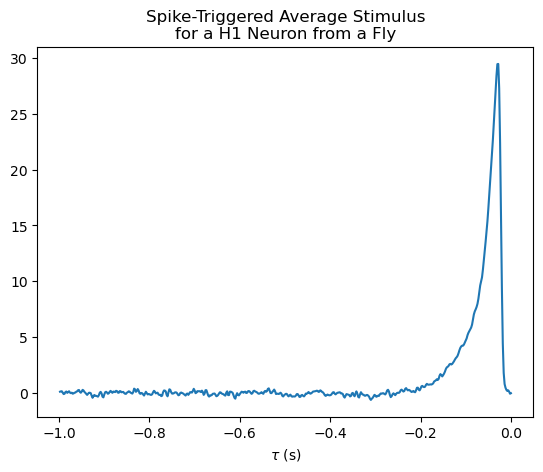

In [147]:
T = 20*60
dt = 0.002

taus = [-i*0.001 for i in range(0, 1000, 2)]
sta = np.array([get_spike_triggered_average(rho, stim, T, dt, -tau) for tau in taus])

plt.plot(taus, sta)
plt.title('Spike-Triggered Average Stimulus\nfor a H1 Neuron from a Fly')
plt.xlabel(r'$\tau$ (s)');
sta = np.flip(sta)

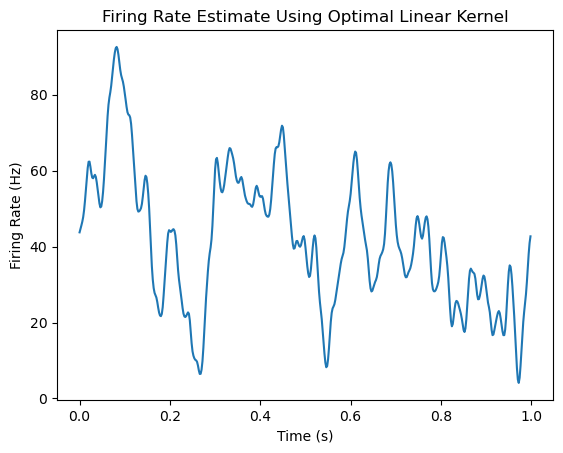

In [148]:
r = np.sum(rho)/T
sigma = np.std(stim)
D = sta*r/(sigma)
taus = [i*0.001 for i in range(0, 1000, 2)]
r_est = np.array([get_firing_rate_estimate(np.sum(rho)/T, D, stim[:500], 0.002, tau) for tau in taus])

plt.plot(taus, r_est)
plt.title("Firing Rate Estimate Using Optimal Linear Kernel")
plt.xlabel("Time (s)")
plt.ylabel("Firing Rate (Hz)");

## Solution 2.2
We can now reuse our Poisson generator from chapter one and our estimate of the firing rate to generate a synthetic spike train.

In [149]:
def generate_poisson_spikes(rate, T, dt=1e-5, as_times = True):
    """
    Generates a spike train as a Poisson process.

    Parameters
    ----------
    rate : {float, array_like}
        The firing rate in Hz. 
        If a float is given a constant firing rate is used.
        If an array is given the value at index i is the firing rate at time step i.
    T : float
        The duration of time to generate spikes for.
    dt : float
        The time step size.
   
    Returns
    -------
    spikes : array_like
        A list of times at which spikes were generated.
    """

    #Since the probability at each time step is intependent we can compare the firing rates at all time steps simultaneously.
    spikes = np.where(rate*dt >= np.random.rand(int(T/dt)), 1, 0)

    # To convert from a list where a 1 at index i indicates a spike at time step i, to a list of times at which spikes occur
    # we simply select all indices at which a spike occurs and multiply the index by the time step size.  
    if as_times:
        spikes = np.linspace(0,T, int(T/dt), endpoint=False)[np.where(spikes == 1)]
    return spikes

In [150]:
spikes = generate_poisson_spikes(r_est, 1, 0.002)

## Solution 2.3
To compare our synthetic and actual spike trains we can generate spike trains from different points in time in response to white noise stimulus which generated the actual spike trains and plot the results.

In [151]:
def get_neural_response(spikes, T, dt=1e-5):
    """
    Calculates the neural response.

    Parameters
    ----------
    spikes : array_like
        A list of times at which spikes occur.
    T : float
        The duration of time simulated in seconds.
    dt : float
        The time step size to use.

    Returns
    -------
    rho : array_like
        neural response array where the value at index i is the number of spikes at time step i.
    """

    bins = np.linspace(0, T, int(T/dt)+1)
    rho = np.histogram(spikes, bins)[0]

    return rho

Since the kernel tends to 0 outside as $\tau$ increases we can append zeros to generate a longer spike train without sacrificing computational efficiency.

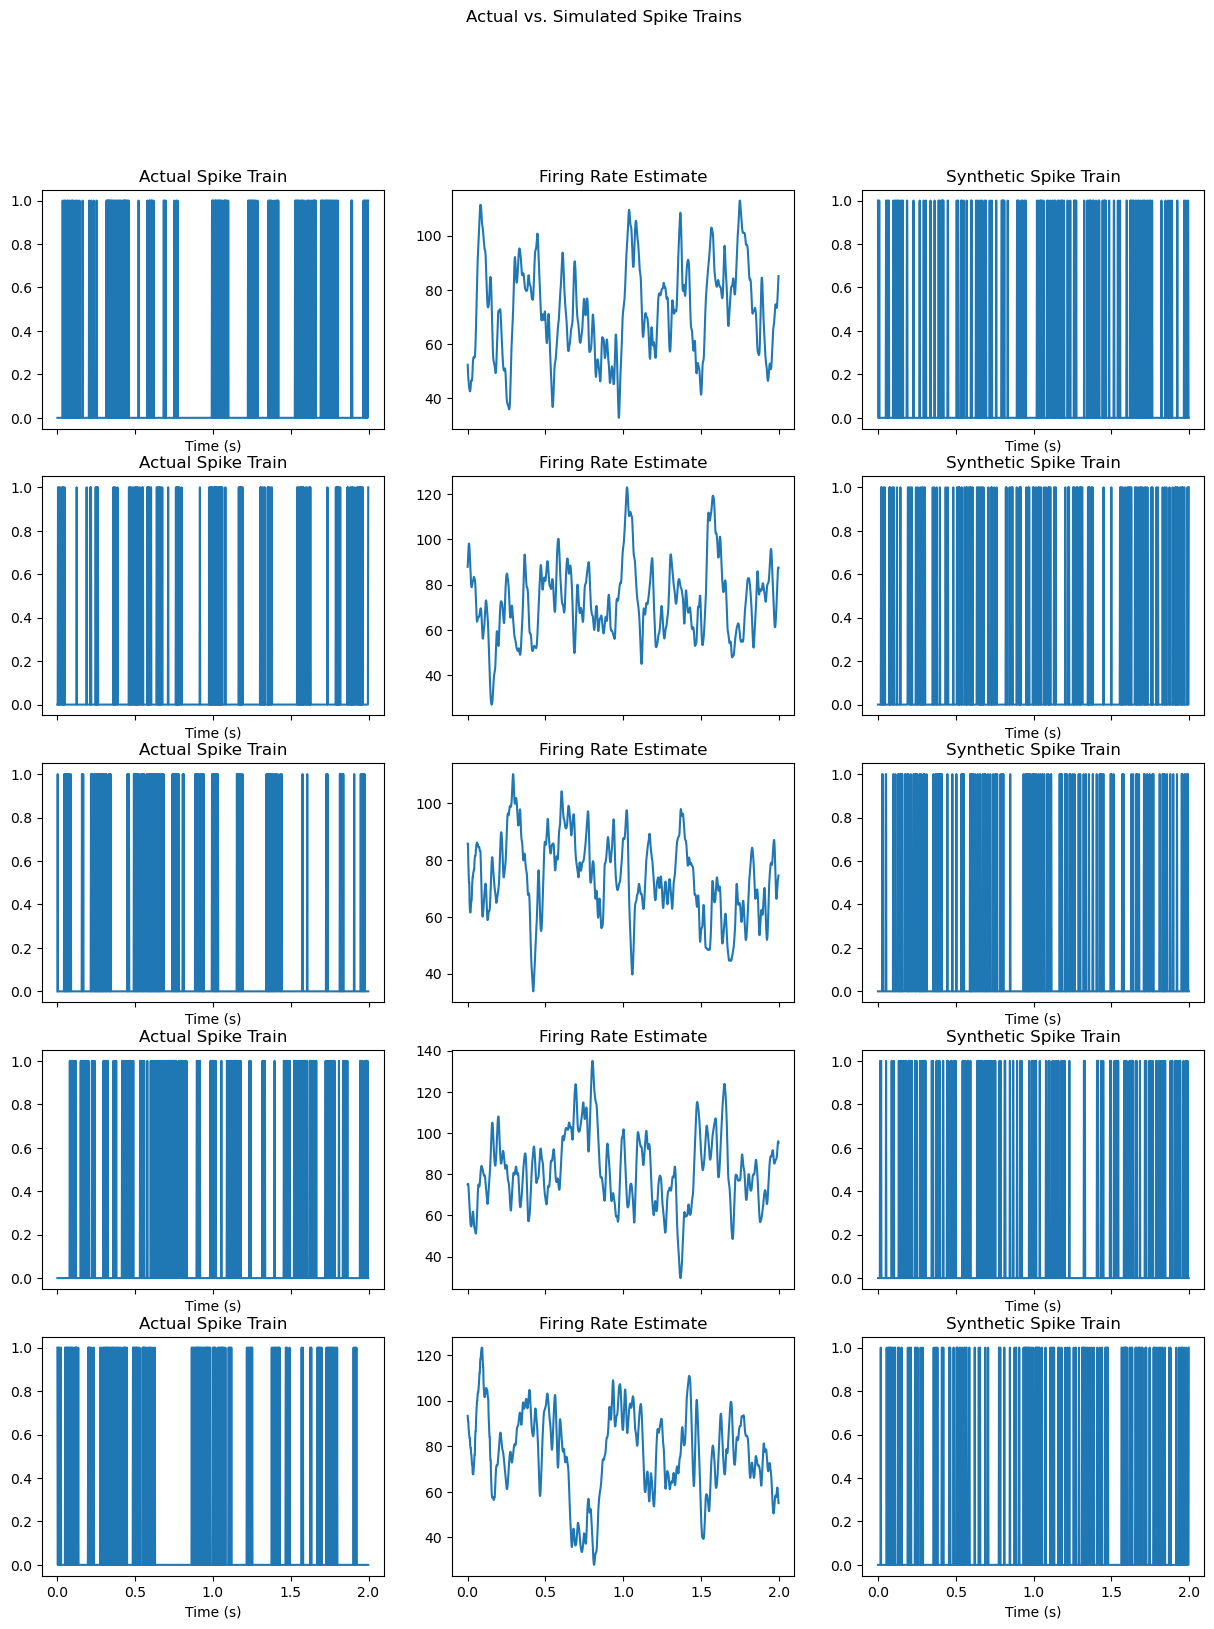

In [152]:
fig, axs = plt.subplots(5, 3, sharex=True, sharey=False)
fig.suptitle("Actual vs. Simulated Spike Trains")
fig.set_figheight(18)
fig.set_figwidth(15)

taus = [i*0.001 for i in range(0, 10000, 2)]

r_est = np.array([get_firing_rate_estimate(np.sum(rho[:5000])/10, np.concatenate([np.zeros(5000 - len(D)), D]), stim[:5000], 0.002, tau) for tau in taus])
spikes = generate_poisson_spikes(r_est, 10, 0.002)
rho_est = get_neural_response(spikes, 10, 0.002)
time = [t*dt for t in range(int(2/dt))]
for i in range(5):


    axs[i][0].plot(time, rho[int(2/0.002)*i:int(2/0.002)*(i+1)])
    axs[i][0].set_title("Actual Spike Train")
    axs[i][0].set_xlabel("Time (s)")
    axs[i][1].plot(time, r_est[int(2/0.002)*i:int(2/0.002)*(i+1)])
    axs[i][1].set_title("Firing Rate Estimate")
    axs[i][2].plot(time, rho_est[int(2/0.002)*i:int(2/0.002)*(i+1)])
    axs[i][2].set_title("Synthetic Spike Train")
    axs[i][2].set_xlabel("Time (s)");

Comparing the synthetic and actual spike trains we can see that both contain simular quantities of spikes, long gaps are much more common in our actual data than our synthetic data.

## Solution 2.4
To plot the spike train autocorrelation we can reuse our `get_spike_train_autocorrelation` code from the chapter one exercises. 

In [153]:
def get_spike_train_autocorrelation(rho, T, dt, tau):
    """
    Calculates the autocorrelation of a spike train given a lag time.

    Parameters
    ----------
    rho : array_like
        The neural response array.
    T : float
        The duration of time simulated in seconds.
    tau : float
        The lag time to use in seconds.

    Returns
    -------
    q : array_like
        The autocorrelation of the spike train given a lag of tau.
    """

    r_avg = np.mean(rho)
    rho_tau = np.roll(rho, int(tau/dt))

    q = (1/T)*np.sum((rho - r_avg)*(rho_tau - r_avg))

    return q

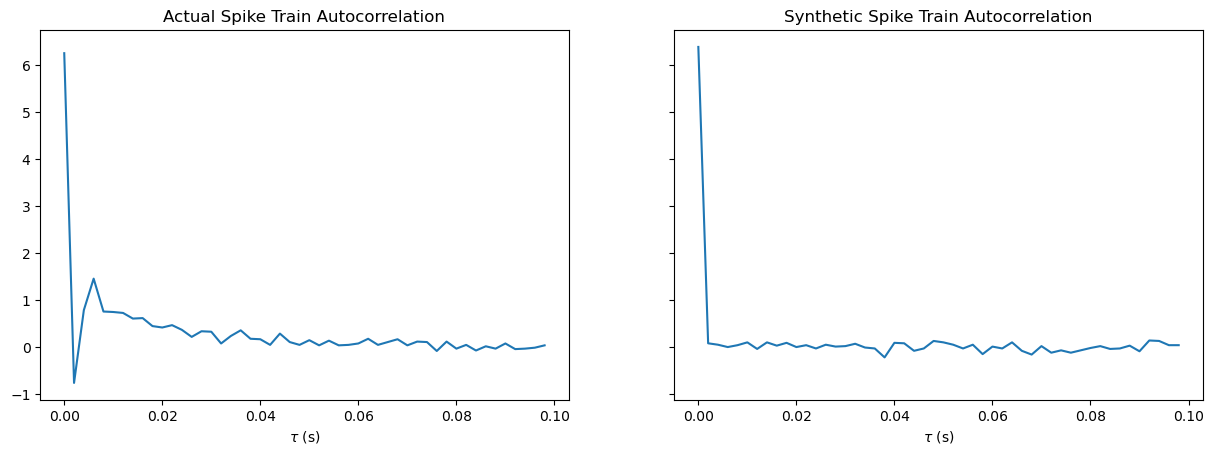

In [154]:
fig, axs = plt.subplots(1, 2, sharex=True, sharey=True)
fig.set_figwidth(15)

taus = [i*0.001 for i in range(0, 100, 2)]

auto_corr = [get_spike_train_autocorrelation(rho[:5000], 100, 0.002, tau) for tau in taus]
axs[0].plot(taus, auto_corr)
axs[0].set_title("Actual Spike Train Autocorrelation")
axs[0].set_xlabel(r'$\tau$ (s)');

times = [i*0.001 for i in range(0, 10000, 2)]
auto_corr_synth = [get_spike_train_autocorrelation(rho_est, 100, 0.002, tau) for tau in taus]

axs[1].plot(taus, auto_corr_synth)
axs[1].set_title('Synthetic Spike Train Autocorrelation')
axs[1].set_xlabel(r'$\tau$ (s)');


As expected the autocorrelation functions are almost identical except the negative correlation at $\tau=0.002$ ms. This is not surprising, however, as real neurons experience a refractory period which we haven't simuluated.

## Solution 2.5 
To calculate the interspike intervals we first need to extract the times at which spikes occured from our data.

In [155]:
def get_spike_times(rho, dt):
    """
    Calculated the times at which spikes occured from a neural response array.

    Parameters
    ----------
    rho : array_like
        The neural response array.
    dt : float
        The temporal resolution of the neural response array.
    
    Returns
    -------
    spikes : array_like
        A list of times at which spikes occured
    """

    time = np.arange(0, len(rho) * dt, dt)
    spikes = time[np.where(rho ==1)]
    
    return spikes

In [156]:
actual_spikes = get_spike_times(rho[:5000], 0.002)

We can now reuse our interspike interval code from chapter 1.

In [157]:
def get_interspike_intervals(spikes):
        """
        Calculates the interspike intervals for the generated spike train.
        
        Parameters
        ----------
        spikes : array_like
            A list of times at which spikes occured.

        Returns
        -------
        interspike_intervals : list
            A list containing the interspike interval durations in seconds. 
        """
        # By offsetting the array by 1 and subtracting we get the difference between each element and the one preceding it.
        interspikes_intervals = spikes[1:] - spikes[:-1]        
        return interspikes_intervals

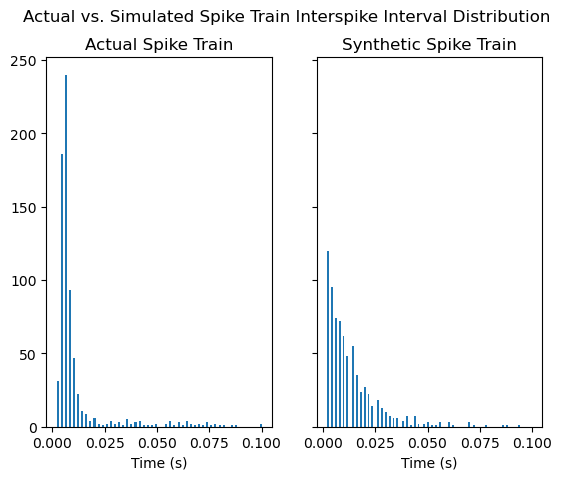

In [158]:
fig, axs = plt.subplots(1, 2, sharex=True, sharey=True)
fig.suptitle("Actual vs. Simulated Spike Train Interspike Interval Distribution")

actual_intervals = get_interspike_intervals(actual_spikes)
axs[0].hist(actual_intervals[actual_intervals <0.1], bins = 100)
axs[0].set_title("Actual Spike Train")
axs[0].set_xlabel("Time (s)")

intervals = get_interspike_intervals(spikes)
axs[1].hist(intervals[intervals <0.1], bins = 100)
axs[1].set_title("Synthetic Spike Train")
axs[1].set_xlabel("Time (s)");


The actual spike train data possesses few interspike intervals shorter than 6 ms. This is also due to the refractory period effect which we haven't incorporated into our model.

## Solution 2.5
Finally, we can simply reuse our `coefficient_of_variation` code from the previous chapter's exercises and compare the results. 

In [159]:
def get_coefficient_of_variation(x):
    """
    Calculates the coefficient of variation of an array.

    Parameters
    ----------
    x : array_like
        An array of numbers.
    
    Returns
    -------
    cv : float
        The coefficient of variation.
    """
    
    cv = np.std(x)/np.mean(x)
    return cv

In [160]:
np.sum(rho[:5000])

733

In [161]:
actual_intervals_cv = get_coefficient_of_variation(actual_intervals)
synthetic_intervals_cv = get_coefficient_of_variation(intervals)
print("Coefficient of Variation for Actual Spike Train: {}".format(actual_intervals_cv))
print("Coefficient of Variation for Synthetic Spike Train: {}".format(synthetic_intervals_cv))

Coefficient of Variation for Actual Spike Train: 1.7939405607247219
Coefficient of Variation for Synthetic Spike Train: 0.9798688579528367


The coefficient of variation for our synthetic spike train appears to be significantly larger. This appears to be because there are a number of large interval values which are not present for our synthetic spike trains.

## Exercise 3
